# Superstore Sales & Profit Analysis

The "Superstore Sales & Profit Analysis" project focuses on exploring the Superstore Dataset from Kaggle to gain valuable insights and uncover trends within the retail environment. This dataset contains detailed information about customer orders, products, sales, and profits, offering a comprehensive view of the store's operations. By conducting an in-depth analysis, we aim to understand the factors influencing sales and profitability, identify significant patterns, and derive actionable insights to optimize business performance. Through this project, we aim to make data-driven decisions that will enhance the store's overall success and customer satisfaction.

# CONTENT
* Importing Libraries
* Data Exploration and Preprocessing
 * Data Types
 * Duplicates
 * Statistics
 * Outliers
* EDA and Data Visualization
 * Sales and Profit Distribution
 * Sales and Profit over Time
 * Segment-wise Sales and Profit
 * Sales and Profit by Category and Sub-Category
 * Sales and Profit by City and Region
* Summary



## Importing Libraries

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Setting seaborn color palette
palette = sns.set_palette('Set2')



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Exploring and Preprocessing

In the data exploration section, we load the dataset and examine its structure, check for missing values, explore unique values in categorical columns to gain a preliminary understanding of the dataset.

In [2]:
data = pd.read_csv("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv", encoding='windows-1252')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

From the provided output, we can extract the following information about the dataset:

* **Structure**:
 * The dataset has a total of 9994 rows and 21 columns.
* **Data Types**:
 * The data types of the columns are automatically inferred by Pandas.
 * Most of the columns are represented as objects (strings) because they contain categorical or textual    information.
 * The columns "Row ID," "Postal Code," "Quantity," and "Profit" are represented as integers.
 * The columns "Sales," "Discount," and "Profit" are represented as floating-point numbers.
 * The columns "Order Date" and "Ship Date" are currently stored as object types. We'll deal with that      in the next step.
* **Missing Values**:
 * The output does not show any missing values (null values) in any of the columns.
For all the 9994 rows, each column has a non-null count of 9994, indicating that there are no missing values present in the dataset.

### Data Type
To facilitate time-series analysis, it would be beneficial to convert columns "Order Date" and "Ship Date" to datetime type.

In [4]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

We can also extract additional date-related features like year, month, and day of the week from 'Order Date' column for further analysis and visualization.

In [5]:
data['Order year'] = data['Order Date'].dt.year 
data['Order Month'] = data['Order Date'].dt.month
data['Order Day of the week'] = data['Order Date'].dt.dayofweek

As we don't intend to use "Postal Code" for calculations, we can convert it to a object data type.



In [6]:
data['Postal Code'] = data['Postal Code'].astype(str)

In [7]:
data.dtypes

Row ID                            int64
Order ID                         object
Order Date               datetime64[ns]
Ship Date                datetime64[ns]
Ship Mode                        object
Customer ID                      object
Customer Name                    object
Segment                          object
Country                          object
City                             object
State                            object
Postal Code                      object
Region                           object
Product ID                       object
Category                         object
Sub-Category                     object
Product Name                     object
Sales                           float64
Quantity                          int64
Discount                        float64
Profit                          float64
Order year                        int64
Order Month                       int64
Order Day of the week             int64
dtype: object

## Duplicates
Let's check our data for duplicates.

In [8]:
data.duplicated().sum()

0

## Statistics
 Let's look at the summary statistics of the numeric columns.



In [9]:
data.describe()

,Row ID,Sales,Quantity,Discount,Profit,Order year,Order Month,Order Day of the week
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686,3.206324
std,2885.163629,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654,2.122925
min,1.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,0.000000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000,1.000000
50%,4997.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000,4.000000
75%,7495.750000,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000,5.000000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,6.000000


From the provided output, we can observe some insights:

 * **Extreme Sales Values**: The "Sales" column has a wide range of values (minimum: 0.444, maximum: 22638.48). The maximum value seems unusually high compared to the majority of sales values. It can be potential outliers or transactions that require further investigation.
 
 * **Negative Profit**: The minimum value in the "Profit" column is -6599.978, indicating instances where losses were incurred on certain transactions. These negative profit values need further investigation to understand the reasons behind the loss.

## Outliers
Now, based on the previously obtained results, we will check for outliers for the columns "Sales" and "Profit".

Through visualizations like box plots, histograms, and scatter plots, we examine the presence of outliers that deviate significantly from the typical distribution of data. We can also use statistical methods such as the z-score or the interquartile range (IQR).

<Axes: xlabel='Profit'>

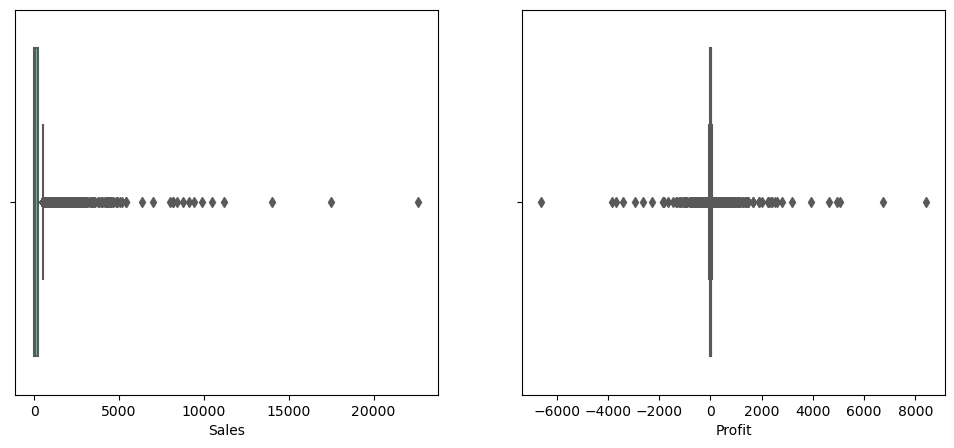

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=data['Sales'], ax =axs[0])
sns.boxplot(x=data['Profit'], ax = axs[1])

The dots we see outside the whiskers in the boxplots are likely outliers.

We can additionally use **Z-score** method to identify outliers. By calculating the z-scores for each data point, we can identify which points deviate significantly from the mean and consider them as potential outliers.

In [12]:
data_numeric = data.select_dtypes(include=[np.number])

for col in data_numeric.columns:
    
    z_score = np.abs(stats.zscore(data[col]))
    outliers_num = len(np.where(z_score > 3)[0])
    if outliers_num:
        print('{}: {}'.format(col, outliers_num)) 

Sales: 127
Quantity: 113
Discount: 300
Profit: 107


The output shows the number of outliers that have a z-score greater than 3 for the columns "Sales", "Quantity", "Discount", and "Profit".

Since the z-score method helps in identifying potential outliers based on their distance from the mean, a z-score greater than 3 is often used as a threshold to detect extreme values.

There are several ways to deal with outliers in a dataset. One of them is to simply remove these records. We can again use Z-score method to do it.

    NOTE: The "Quantity" and "Discount" columns represent discrete variables, therefore it would be better to leave them without changes.

In [13]:
# data_numeric = data_numeric.drop(['Quantity', 'Discount'])

z_scores = np.abs(stats.zscore(data_numeric))

# Save old DataFrame
old_data = data.copy()

# DataFrame without outliers
data = data[(z_scores < 3).all(axis=1)]
data.shape

(9436, 24)

While the summary statistics provide initial insights, visualizations can offer a more comprehensive understanding of the data distribution, relationships between variables, and any anomalies or patterns present in the dataset. Therefore, let's move on to EDA and data visualization to further explore and analyze the dataset.

## Exploratory Data Analysis and Data Visualization¶



### Sales and Profit Distribution
Now we are going to look at the distribution of numerical columns "Sales" and "Profit" to understand their patterns.

<Axes: xlabel='Profit', ylabel='Count'>

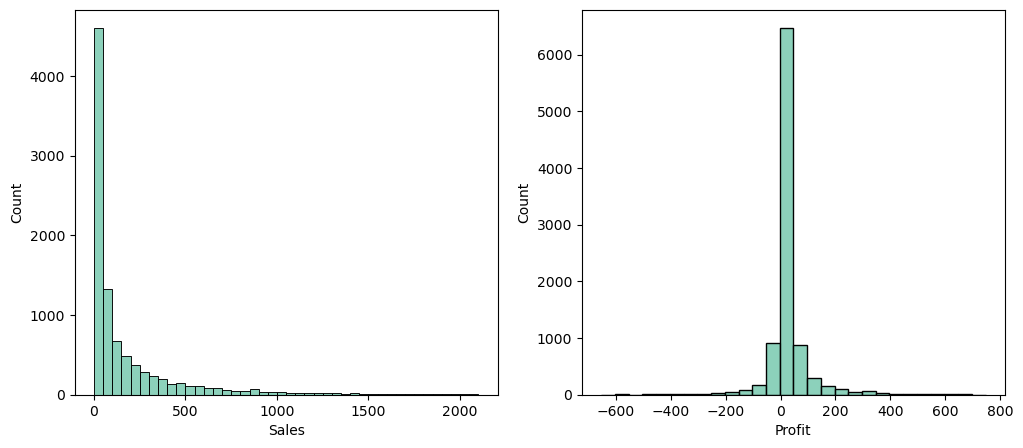

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(x = data['Sales'], ax = axs[0], binwidth = 50 )

sns.histplot(x=data['Profit'], ax =axs[1],binwidth = 50)

#### Sales and Profit over Time
Let's create line plots to observe the trend of sales and profit over different time intervals.

First we need to aggregate sales and profit monthly for each year.

In [15]:
group_by_year_month = data.groupby(['Order year', 'Order Month'])
sales_profit_monthly = group_by_year_month[['Sales','Profit']].sum().reset_index()

In [16]:
def lineplot_monthly(data, parameter, hue=None, palette=None):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Order Month', y=parameter, hue=hue, marker='o', palette=palette)
    plt.title(f'Monthly {parameter} Trend')
    plt.xlabel('Month')
    plt.ylabel(parameter)
    plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if hue:
        plt.legend(title='Year', loc='best')
    plt.grid(True)

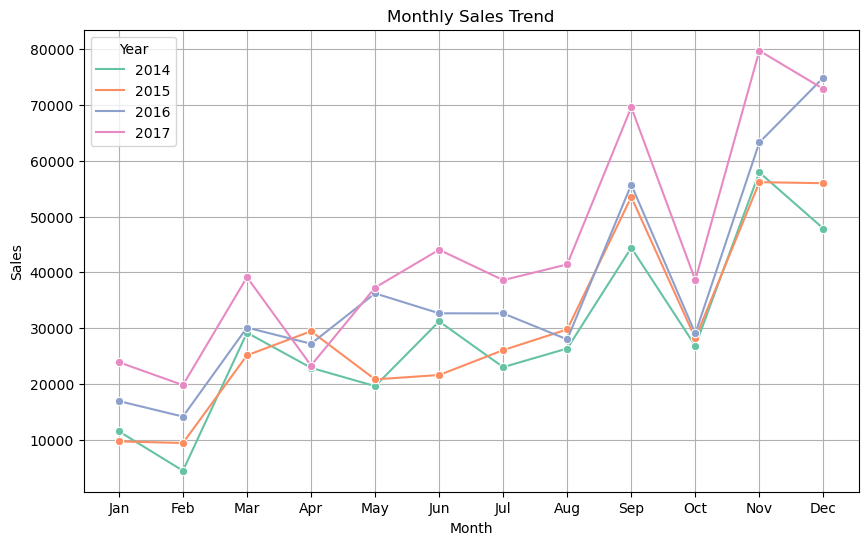

In [17]:
lineplot_monthly(sales_profit_monthly, 'Sales', hue='Order year', palette='Set2')

Here are the observations we can get from this graph:

 * The line plot shows a clear upward trend in sales from January to December each year. It tells us about higher demand during certain months, possibly due to holiday seasons, festive occasions, or annual sales events.
 * The sudden drop in sales during October stands out as an anomaly in the otherwise upward trend. Further investigation is required to understand the reasons behind the significant decrease in sales during October. Possible factors could include changes in marketing strategies, external events, or product-related issues during that specific month.
 * The yearly sales trend demonstrates an overall positive growth in sales from 2014 to 2017.

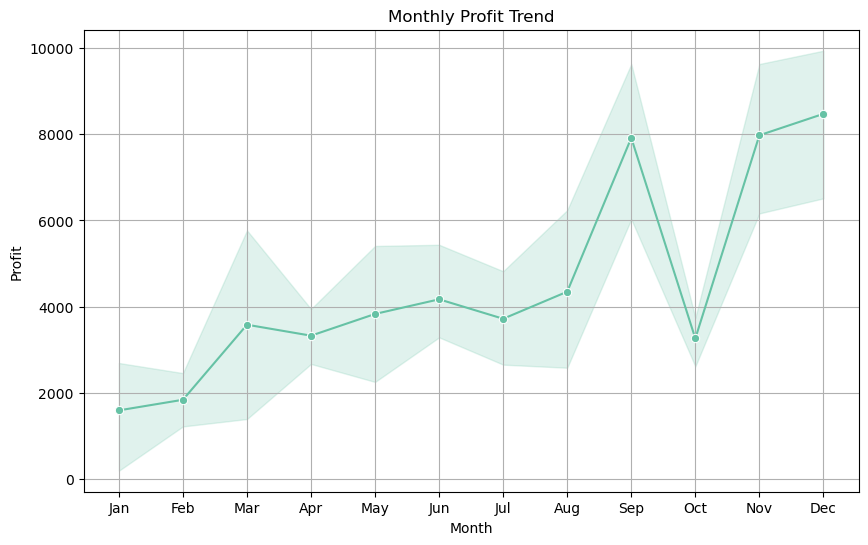

In [19]:
lineplot_monthly(sales_profit_monthly, 'Profit')

In general there is a similarity in the trend of the profit graph with the sales graph. When sales increase, it leads to a corresponding increase in profit, and vice versa.

### Segment-wise Sales and Profit
In this section we are going to compare sales and profit across different customer segments.

In [20]:
sales_profit_by_segment = data.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

To create a double bar plot with Sales and Profit, we must melt the data into a long format to have a tidy dataset that facilitates the plotting process.

In [24]:
sales_profit_by_segment_long = pd.melt(sales_profit_by_segment, id_vars=['Segment'], 
                                    var_name='Measure', value_vars=['Sales', 'Profit'], value_name='Count')
sales_profit_by_segment_long

,Segment,Measure,Count
0,Consumer,Sales,860252.7864
1,Corporate,Sales,527227.8608
2,Home Office,Sales,292316.7295
3,Consumer,Profit,108807.6692
4,Corporate,Profit,65418.1394
5,Home Office,Profit,41962.1470


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

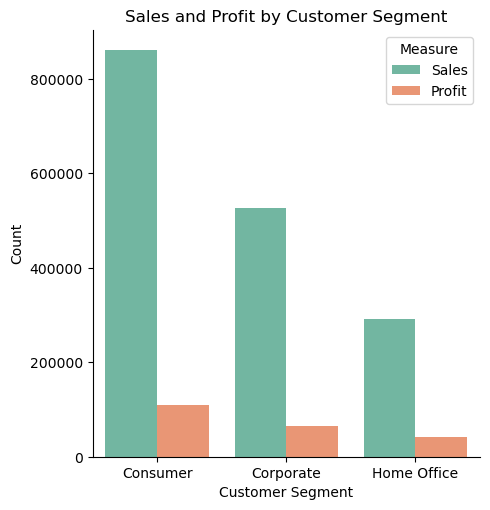

In [26]:
sns.catplot(kind = 'bar', data = sales_profit_by_segment_long, x = 'Segment', y='Count', hue = 'Measure', legend_out=False)

plt.title("Sales and Profit by Customer Segment")
plt.xlabel("Customer Segment")
plt.show

At first sight the "Consumer" segment has the highest sales and the highest profit. But can we claim that it is the most profitable segment?

The answer is No. We should look at **Profit Margin**. It looks like the "Home Office" has the highest one. Let's check it.

In [28]:
sales_profit_by_segment['Profit/Sales'] = sales_profit_by_segment['Profit']/sales_profit_by_segment['Sales']
sales_profit_by_segment

,Segment,Sales,Profit,Profit/Sales
0,Consumer,860252.7864,108807.6692,0.126483
1,Corporate,527227.8608,65418.1394,0.124079
2,Home Office,292316.7295,41962.1470,0.143550


Now we can see that the "Home Office" segment has the highest Profit/Sales ratio, making it the most efficient in terms of profitability.

The "Consumer" segment has the lowest Profit/Sales ratio, suggesting that it retains a slightly lower proportion of its sales revenue as profit compared to the other segments.

Overall, the Profit Margins for all three segments are relatively close, indicating that the company is generally managing profitability efficiently across its different customer segments.

### Sales and Profit by Category and Sub-Category
After analyzing Sales and Profit by customer segment, let's identify the top-performing and underperforming categories and sub-categories.

In [29]:
sales_profit_by_category = data.groupby(['Category'])[['Sales', 'Profit']].sum().reset_index()

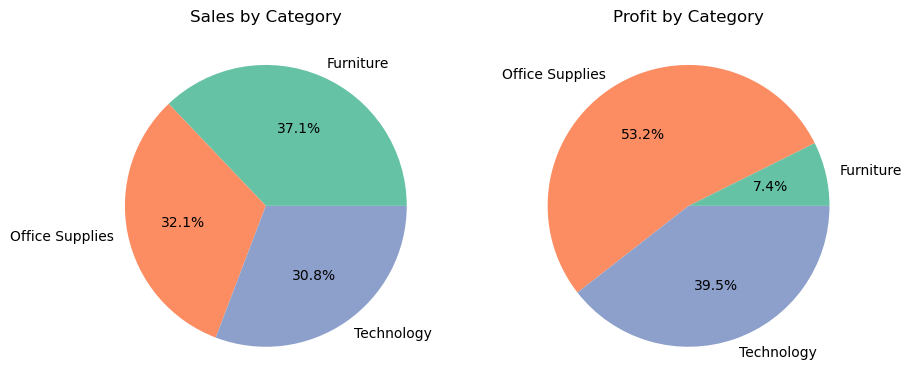

In [34]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].pie(sales_profit_by_category['Sales'], labels=sales_profit_by_category['Category'], autopct='%1.1f%%')
ax[0].title.set_text('Sales by Category')
ax[1].pie(sales_profit_by_category['Profit'], labels=sales_profit_by_category['Category'], autopct='%1.1f%%')
ax[1].title.set_text('Profit by Category')


It's obvious that "Furniture", "Office Supplies", and "Technology" have relatively similar sales percentages, with each contributing to approximately 1/3 of total sales.

"Office Supplies" generate the highest profit, accounting for 50.2% of total profits, despite having a similar sales percentage to Furniture and Technology. "Furniture", while having almost similar sales percentage (even the highest), contributes to only 8.3% of total profits, indicating lower profit margins compared to the other categories.

In [35]:
sales_profit_by_subcategory = data.groupby(['Sub-Category'])[['Sales', 'Profit']].sum().reset_index()

sales_profit_by_subcategory_long = pd.melt(sales_profit_by_subcategory, id_vars=['Sub-Category'], 
                                    var_name='Measure', value_vars=['Sales', 'Profit'], value_name='Count')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


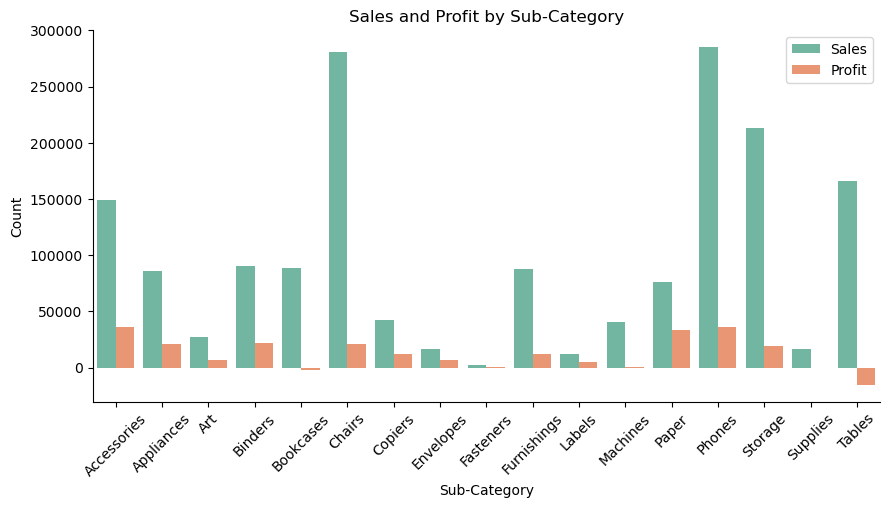

In [36]:
sns.catplot(kind='bar', data=sales_profit_by_subcategory_long, x='Sub-Category', y='Count', hue='Measure', legend_out=False, 
           height=4.5, aspect=2)
plt.title('Sales and Profit by Sub-Category')
plt.legend(loc='best');
plt.xticks(rotation=45);

We can see that some sub-categories (e.g., "Accessories" or "Appliances") have high sales and substantial profits, making them highly profitable for the business.

On the other hand, there are sub-categories (e.g., "Bookcases" or "Tables") which are incurring losses, indicating the need for further investigation into their cost structures and pricing strategies to improve profitability.

For a better understanding, we can take a closer look at the **Profit Margin**. And let's additionally divide sub-categories into 3 groups: highly profitable, moderately profitable, and unprofitable.

In [37]:
sales_profit_by_subcategory['Profit/Sales'] = sales_profit_by_subcategory['Profit']/sales_profit_by_subcategory['Sales']

sales_profit_by_subcategory['Profitability'] = pd.cut(sales_profit_by_subcategory['Profit/Sales'], 
                                                     bins=[-np.inf, 0, 0.2, np.inf],
                                                     labels=['loss', 'moderate', 'high'])
sales_profit_by_subcategory

,Sub-Category,Sales,Profit,Profit/Sales,Profitability
0,Accessories,148733.2960,36421.8573,0.244880,high
1,Appliances,85565.4890,21335.7810,0.249350,high
2,Art,26957.1920,6491.0574,0.240791,high
3,Binders,90211.3750,22178.2053,0.245847,high
4,Bookcases,88588.9977,-2188.8628,-0.024708,loss
5,Chairs,280872.7060,21413.2608,0.076238,moderate
6,Copiers,42639.0080,12322.7236,0.289001,high
7,Envelopes,16476.4020,6964.1767,0.422676,high
8,Fasteners,2730.6480,877.4990,0.321352,high
9,Furnishings,87934.5800,11854.8164,0.134814,moderate


Now we can clearly see which subcategory is the most profitable and which is the unprofitable one

### Sales and Profit by City and Region
In this section, I'd like to analyze Sales and Profit in different locations.

In [38]:
sales_profit_by_region_city = data.groupby(['Region','City'])[['Sales','Profit']].sum().reset_index()

Since we have many cities, let's analyze only the top 15.

In [46]:
def top(data, parameter, top=15):
    data = data.sort_values(by=[parameter],ascending = False)[:top]
    plt.figure(figsize = (12,6))
    sns.barplot(data = data, x=parameter, y ='City', hue='Region')
    plt.title(f'Top {top} Cities by {parameter}')
    plt.legend(loc='best')
    return data

,Region,City,Sales,Profit
249,East,New York City,160781.5360,32309.1827
489,West,Los Angeles,137508.9970,23836.9530
542,West,San Francisco,86389.1230,14799.8934
259,East,Philadelphia,83482.7430,-10551.1632
553,West,Seattle,79574.7040,15409.3153
72,Central,Houston,48371.8708,150.8467
26,Central,Chicago,38427.8610,-883.8492
541,West,San Diego,35198.2830,4924.5625
41,Central,Detroit,25814.0920,6793.1143
340,South,Jacksonville,18943.8230,-620.5938


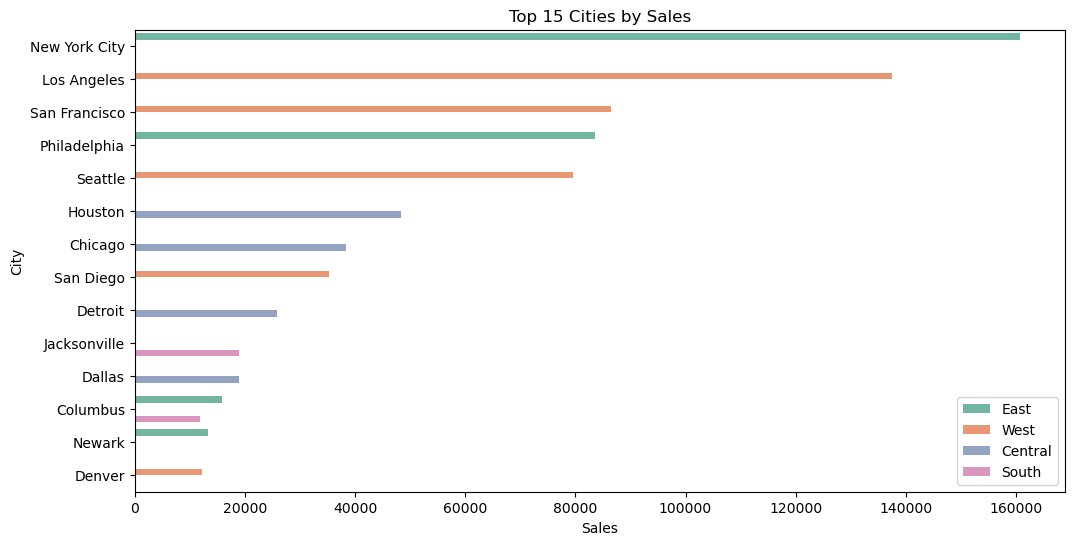

In [47]:
top(sales_profit_by_region_city,'Sales')

,Region,City,Sales,Profit
249,East,New York City,160781.536,32309.1827
489,West,Los Angeles,137508.997,23836.9530
553,West,Seattle,79574.704,15409.3153
542,West,San Francisco,86389.123,14799.8934
41,Central,Detroit,25814.092,6793.1143
541,West,San Diego,35198.283,4924.5625
306,South,Columbus,11905.120,3339.7401
393,South,Springfield,10853.100,3271.7621
102,Central,Milwaukee,11410.220,2793.0851
382,South,Richmond,8354.270,2615.4555


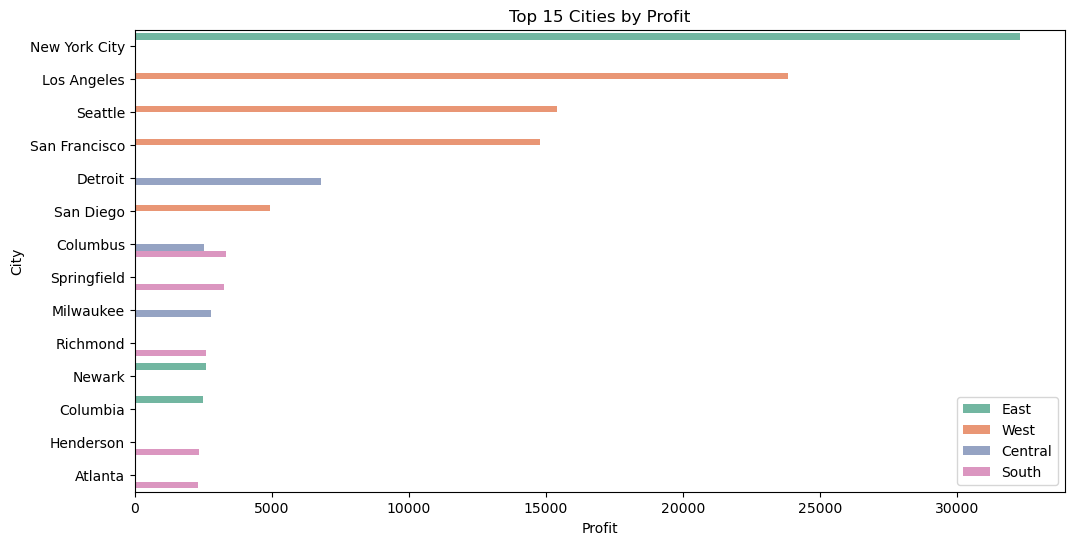

In [48]:
top(sales_profit_by_region_city,'Profit')

Insights from the provided outputs:

1. Top Sales by Region and City:
     * The cities with the highest sales are New York City (Region: East), followed by Los Angeles (Region: West), and San Francisco (Region: West).
2. Top Profit by Region and City:
     * The cities with the highest profits are New York City (Region: East), followed by Los Angeles (Region: West), and Seattle (Region: West).
     * Notice, that Seattle, despite having lower sales compared to San Francisco, surpasses it in terms of profit.
3. Negative Profit Cities:
    *  Some cities, such as Philadelphia (Region: East), Chicago (Region: Central), Jacksonville (Region: South), Dallas (Region: Central), Columbus (Region: East), and Denver (Region: West), have negative profits, indicating losses.

# Summary

In this data analysis project, we explored a superstore dataset, delving into various aspects related to store sales and profitability. Through Exploratory Data Analysis (EDA), we gained valuable insights by visualizing sales and profit trends across different categories and sub-categories. We also analyzed sales and profit metrics based on customer segments, regions, and cities. Outliers were identified and handled using z-scores to ensure data reliability.

Key findings and takeaways from the analysis include:

1. Sales and profit generally show an upward trend from January to December, with a slight dip in October.

2. The three main product categories, Office Supplies, Furniture, and Technology, contribute almost equally to total sales, but their profitability varies significantly. Office Supplies are the most profitable, while Furniture lags behind in terms of profitability.

3. By analyzing sub-categories, we identified highly profitable, moderately profitable, and unprofitable ones, offering actionable insights for product and marketing strategies.

4. Among customer segments, the "Home Office" segment stands out as the most profitable, followed by "Corporate" and "Consumer" segments.

5. Geographically, New York City and Los Angeles dominate both sales and profit, while Seattle exhibits higher profitability despite lower sales compared to San Francisco.

Overall, the "Superstore Sales & Profit Analysis" project provides valuable insights that can guide strategic decision-making, resource allocation, and marketing efforts to optimize sales and increase profitability for the superstore. The project exemplifies the power of data analysis in understanding business trends and making informed decisions to enhance overall success.